In [1]:
import mrcnn
import mrcnn.config
import mrcnn.model
import mrcnn.visualize
import cv2
import os
import random

CLASS_NAMES = ['', 'pikachu']

class SimpleConfig(mrcnn.config.Config):
    NAME = "pikachu_inference"
    
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    NUM_CLASSES = len(CLASS_NAMES)

model = mrcnn.model.MaskRCNN(mode="inference", 
                             config=SimpleConfig(),
                             model_dir=os.getcwd())

model.load_weights(filepath="../mask_rcnn_pikachu.h5", 
                   by_name=True)


Using TensorFlow backend.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.








In [2]:
dirname = "test"
images  = os.listdir(dirname)
images = [ "{}\\{}".format(dirname,i) for i in images ]
images

['test\\01.jpg',
 'test\\02.jpg',
 'test\\03.gif',
 'test\\04.jpg',
 'test\\05.jpg',
 'test\\06.jpg',
 'test\\07.jpg',
 'test\\08.png',
 'test\\09.jpg']

test\08.png
Processing 1 images
image                    shape: (365, 375, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


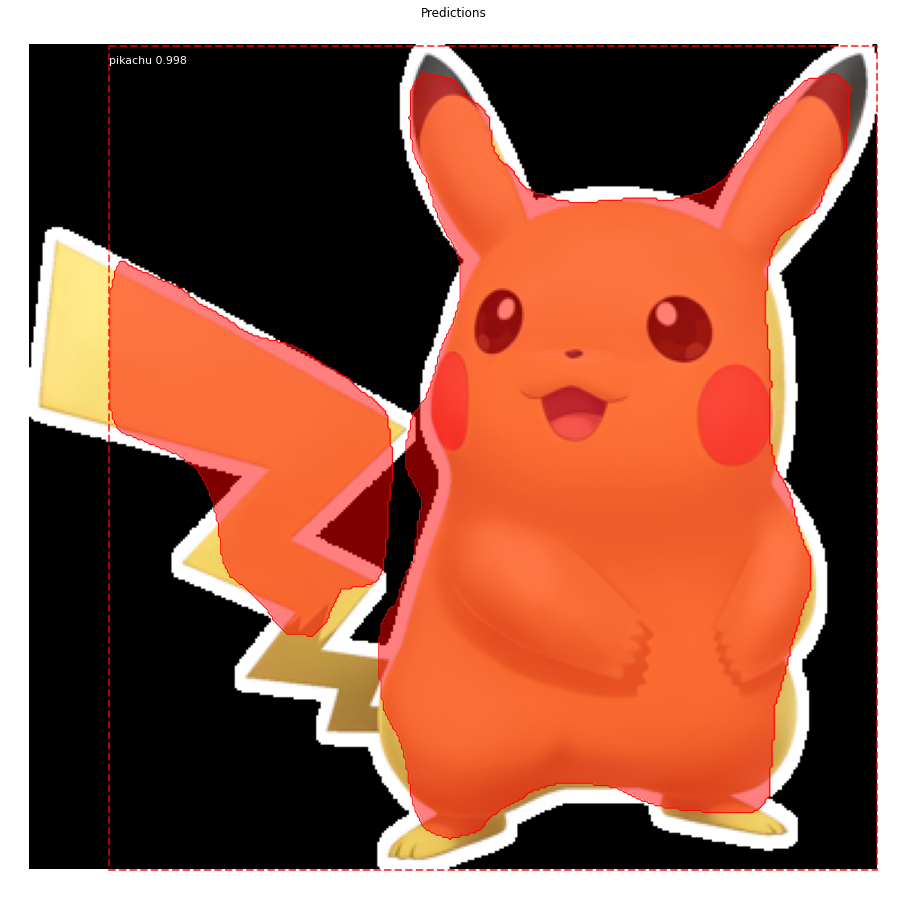

In [3]:
image = random.choice(images)
print(image)
image = cv2.imread(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Run object detection
results = model.detect([image], verbose=1)

# Display results
r = results[0]
mrcnn.visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            CLASS_NAMES, r['scores'], 
                            title="Predictions")